1.  Import libraries and files

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# ID of the Google Sheet for song preferences
sheet_id = "1RdEeElyopoO_n-AthoKZE36ZwoUuLkZHeG7XEQikF5k"

# Title of the Google Sheet
sheet_name = "154702966"

# URL to download the Google Sheet as a CSV
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={sheet_name}"

# Create a Pandas DataFrame from the CSV data
songs_df = pd.read_csv(url,
                       index_col=['song_name', 'artist'])


to_drop = ['id', 'html']
songs_df = songs_df.drop(columns=to_drop)

In [ ]:
songs_df

danceability  \
song_name                                          artist                               
My Band                                            D12                            851   
The Real Slim Shady                                Eminem                         949   
Águas De Março                                     Antônio Carlos Jobim           642   
The Girl From Ipanema                              Stan Getz                      641   
Paint It, Black                                    The Rolling Stones             464   
Sultans Of Swing                                   Dire Straits                   733   
Space Raiders - Charlotte de Witte Remix           Eats Everything                749   
In Silence                                         Amelie Lens                    736   
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P... Johannes Brahms                184   
Nocturne en mi bémol majeur opus 9 n°2: Ballade... Frédéric Chopin                387   

                                                                         energy  \
song_name                                          artist                         
My Band                                            D12                   849.00   
The Real Slim Shady                                Eminem                661.00   
Águas De Março                                     Antônio Carlos Jobim  339.00   
The Girl From Ipanema                              Stan Getz               0.14   
Paint It, Black                                    The Rolling Stones    795.00   
Sultans Of Swing                                   Dire Straits          794.00   
Space Raiders - Charlotte de Witte Remix           Eats Everything       731.00   
In Silence                                         Amelie Lens           845.00   
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P... Johannes Brahms       833.00   
Nocturne en mi bémol majeur opus 9 n°2: Ballade... Frédéric Chopin       451.00   

                                                                         key  \
song_name                                          artist                      
My Band                                            D12                     1   
The Real Slim Shady                                Eminem                  5   
Águas De Março                                     Antônio Carlos Jobim    3   
The Girl From Ipanema                              Stan Getz               8   
Paint It, Black                                    The Rolling Stones      1   
Sultans Of Swing                                   Dire Straits            5   
Space Raiders - Charlotte de Witte Remix           Eats Everything         4   
In Silence                                         Amelie Lens             1   
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P... Johannes Brahms         3   
Nocturne en mi bémol majeur opus 9 n°2: Ballade... Frédéric Chopin         3   

                                                                         loudness  \
song_name                                          artist                           
My Band                                            D12                     -3.383   
The Real Slim Shady                                Eminem                  -4.244   
Águas De Março                                     Antônio Carlos Jobim   -15.503   
The Girl From Ipanema                              Stan Getz              -16.790   
Paint It, Black                                    The Rolling Stones      -9.267   
Sultans Of Swing                                   Dire Straits           -10.023   
Space Raiders - Charlotte de Witte Remix           Eats Everything        -10.865   
In Silence                                         Amelie Lens            -12.017   
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P... Johannes Brahms        -33.503   
Nocturne en mi bémol majeur opus 9 n°2: Ballade... Frédéric Chopin        -24.698   

                         

What kind of music do you all like the most?

In [ ]:
# Calculate the average score for each column
average_scores = songs_df.mean()

# Sort the columns by their average scores in descending order
sorted_columns = average_scores.sort_values(ascending=False)

# Select the top 3 columns from the sorted DataFrame
top_3_columns = sorted_columns[:3]

# Print the top 3 columns
top_3_columns

duration_ms     287493.800
danceability       633.600
energy             629.814
dtype: float64

Which 3 foods do you all like the least?

In [ ]:
# Select the lowest 3 columns from the sorted DataFrame
lowest_3_columns = sorted_columns[-3:]

# Print the top 3 columns
lowest_3_columns

key          3.4000
mode         0.8000
loudness   -14.0293
dtype: float64

3.  Clustering in 2 dimensions

In [ ]:
two_features_df = songs_df.iloc[:, :3].copy()
two_features_df

danceability  \
song_name                                          artist                               
My Band                                            D12                            851   
The Real Slim Shady                                Eminem                         949   
Águas De Março                                     Antônio Carlos Jobim           642   
The Girl From Ipanema                              Stan Getz                      641   
Paint It, Black                                    The Rolling Stones             464   
Sultans Of Swing                                   Dire Straits                   733   
Space Raiders - Charlotte de Witte Remix           Eats Everything                749   
In Silence                                         Amelie Lens                    736   
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P... Johannes Brahms                184   
Nocturne en mi bémol majeur opus 9 n°2: Ballade... Frédéric Chopin                387   

                                                                         energy  \
song_name                                          artist                         
My Band                                            D12                   849.00   
The Real Slim Shady                                Eminem                661.00   
Águas De Março                                     Antônio Carlos Jobim  339.00   
The Girl From Ipanema                              Stan Getz               0.14   
Paint It, Black                                    The Rolling Stones    795.00   
Sultans Of Swing                                   Dire Straits          794.00   
Space Raiders - Charlotte de Witte Remix           Eats Everything       731.00   
In Silence                                         Amelie Lens           845.00   
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P... Johannes Brahms       833.00   
Nocturne en mi bémol majeur opus 9 n°2: Ballade... Frédéric Chopin       451.00   

                                                                         key  
song_name                                          artist                     
My Band                                            D12                     1  
The Real Slim Shady                                Eminem                  5  
Águas De Março                                     Antônio Carlos Jobim    3  
The Girl From Ipanema                              Stan Getz               8  
Paint It, Black                                    The Rolling Stones      1  
Sultans Of Swing                                   Dire Straits            5  
Space Raiders - Charlotte de Witte Remix           Eats Everything         4  
In Silence                                         Amelie Lens             1  
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P... Johannes Brahms         3  
Nocturne en mi bémol majeur opus 9 n°2: Ballade... Frédéric Chopin         3

In [ ]:
# 1. import the model
from sklearn.cluster import KMeans

# 2. initialise the model
random_seed = 123

my_2d_kmeans = KMeans(n_clusters = 5, # we'll explore how to choose the number of clusters in a later notebook
                      random_state = random_seed)

# 3. fit the model to the data
my_2d_kmeans.fit(two_features_df)

KMeans(n_clusters=5, random_state=123)

Visualisation of data points and clusters

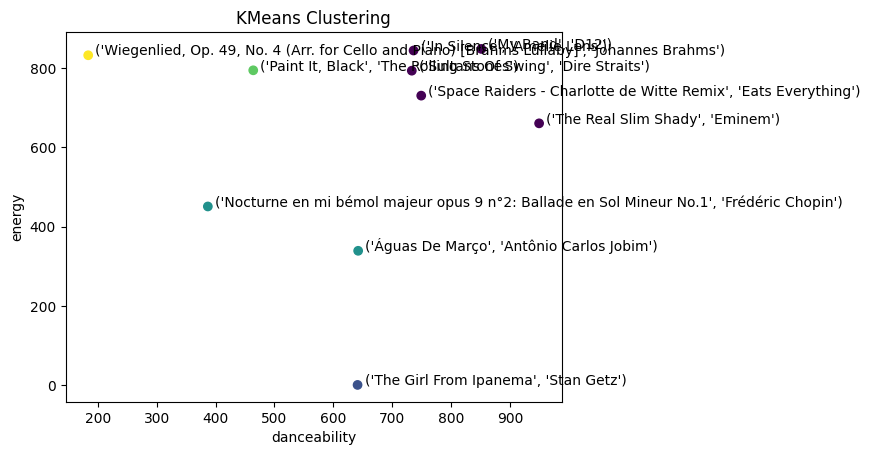

In [ ]:
# @title Visualisation of data points and clusters

# Plot the data points
plt.scatter(x = two_features_df.iloc[:, 0],
            y = two_features_df.iloc[:, 1],
            c = my_2d_kmeans.labels_,
            cmap = 'viridis')

# Annotate the data points
for idx, row in two_features_df.iterrows():
    plt.annotate(idx, (row["danceability"], row["energy"]), xytext=(5, 0), textcoords='offset points')

# Add labels and title
plt.title('KMeans Clustering')
plt.xlabel(two_features_df.columns[0])
plt.ylabel(two_features_df.columns[1])

# Display the plot
plt.show()

Clusters and centroids

In [ ]:
# @title Clusters and centroids

# Plot the data points
plt.scatter(x = two_features_df.iloc[:, 0],
            y = two_features_df.iloc[:, 1],
            c = my_2d_kmeans.labels_,
            cmap = 'viridis')

# Plot the cluster centers
plt.scatter(x = my_2d_kmeans.cluster_centers_[:, 0],
            y = my_2d_kmeans.cluster_centers_[:, 1],
            c = 'red',
            marker = 'x',
            s = 100)

# Add labels and title
plt.title('KMeans Clustering')
plt.xlabel(two_features_df.columns[0])
plt.ylabel(two_features_df.columns[1])

# Display the plot
plt.show()

In [ ]:
# obtain the cluster output
table = my_2d_kmeans.labels_

# attach the cluster output to our original DataFrame
two_features_df["table"] = table

two_features_df.sort_values(by="table")

danceability  \
song_name                                          artist                               
My Band                                            D12                            851   
The Real Slim Shady                                Eminem                         949   
Sultans Of Swing                                   Dire Straits                   733   
Space Raiders - Charlotte de Witte Remix           Eats Everything                749   
In Silence                                         Amelie Lens                    736   
The Girl From Ipanema                              Stan Getz                      641   
Águas De Março                                     Antônio Carlos Jobim           642   
Nocturne en mi bémol majeur opus 9 n°2: Ballade... Frédéric Chopin                387   
Paint It, Black                                    The Rolling Stones             464   
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P... Johannes Brahms                184   

                                                                         energy  \
song_name                                          artist                         
My Band                                            D12                   849.00   
The Real Slim Shady                                Eminem                661.00   
Sultans Of Swing                                   Dire Straits          794.00   
Space Raiders - Charlotte de Witte Remix           Eats Everything       731.00   
In Silence                                         Amelie Lens           845.00   
The Girl From Ipanema                              Stan Getz               0.14   
Águas De Março                                     Antônio Carlos Jobim  339.00   
Nocturne en mi bémol majeur opus 9 n°2: Ballade... Frédéric Chopin       451.00   
Paint It, Black                                    The Rolling Stones    795.00   
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P... Johannes Brahms       833.00   

                                                                         table  
song_name                                          artist                       
My Band                                            D12                       0  
The Real Slim Shady                                Eminem                    0  
Sultans Of Swing                                   Dire Straits              0  
Space Raiders - Charlotte de Witte Remix           Eats Everything           0  
In Silence                                         Amelie Lens               0  
The Girl From Ipanema                              Stan Getz                 1  
Águas De Março                                     Antônio Carlos Jobim      2  
Nocturne en mi bémol majeur opus 9 n°2: Ballade... Frédéric Chopin           2  
Paint It, Black                                    The Rolling Stones        3  
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P... Johannes Brahms           4

 Clustering in multiple dimensions

In [ ]:
# initialize the model
my_full_kmeans = KMeans(n_clusters = 5, # we'll explore how to choose the number of clusters in a later notebook
                        random_state = random_seed)

# fit the model to the data
my_full_kmeans.fit(songs_df)

# obtain the cluster output
table = my_full_kmeans.labels_

# attach the cluster output to our original DataFrame
songs_df["table"] = table

songs_df.sort_values(by="table")

danceability  \
song_name                                          artist                               
Space Raiders - Charlotte de Witte Remix           Eats Everything                749   
In Silence                                         Amelie Lens                    736   
Águas De Março                                     Antônio Carlos Jobim           642   
Paint It, Black                                    The Rolling Stones             464   
The Girl From Ipanema                              Stan Getz                      641   
Sultans Of Swing                                   Dire Straits                   733   
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P... Johannes Brahms                184   
My Band                                            D12                            851   
The Real Slim Shady                                Eminem                         949   
Nocturne en mi bémol majeur opus 9 n°2: Ballade... Frédéric Chopin                387   

                                                                         energy  \
song_name                                          artist                         
Space Raiders - Charlotte de Witte Remix           Eats Everything       731.00   
In Silence                                         Amelie Lens           845.00   
Águas De Março                                     Antônio Carlos Jobim  339.00   
Paint It, Black                                    The Rolling Stones    795.00   
The Girl From Ipanema                              Stan Getz               0.14   
Sultans Of Swing                                   Dire Straits          794.00   
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P... Johannes Brahms       833.00   
My Band                                            D12                   849.00   
The Real Slim Shady                                Eminem                661.00   
Nocturne en mi bémol majeur opus 9 n°2: Ballade... Frédéric Chopin       451.00   

                                                                         key  \
song_name                                          artist                      
Space Raiders - Charlotte de Witte Remix           Eats Everything         4   
In Silence                                         Amelie Lens             1   
Águas De Março                                     Antônio Carlos Jobim    3   
Paint It, Black                                    The Rolling Stones      1   
The Girl From Ipanema                              Stan Getz               8   
Sultans Of Swing                                   Dire Straits            5   
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P... Johannes Brahms         3   
My Band                                            D12                     1   
The Real Slim Shady                                Eminem                  5   
Nocturne en mi bémol majeur opus 9 n°2: Ballade... Frédéric Chopin         3   

                                                                         loudness  \
song_name                                          artist                           
Space Raiders - Charlotte de Witte Remix           Eats Everything        -10.865   
In Silence                                         Amelie Lens            -12.017   
Águas De Março                                     Antônio Carlos Jobim   -15.503   
Paint It, Black                                    The Rolling Stones      -9.267   
The Girl From Ipanema                              Stan Getz              -16.790   
Sultans Of Swing                                   Dire Straits           -10.023   
Wiegenlied, Op. 49, No. 4 (Arr. for Cello and P... Johannes Brahms        -33.503   
My Band                                            D12                     -3.383   
The Real Slim Shady                                Eminem                  -4.244   
Nocturne en mi bémol majeur opus 9 n°2: Ballade... Frédéric Chopin        -24.698   

                         

##Do you agree with the **liveness** scores that certain songs have been given?

##Definition of liveness:
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.


Since liveness scores above 0.8 strongly indicate live performance, this track would need to include those telltale signs—**crowd noise, applause, and other live-audience sound**s.



Not live songs:

Space Raiders - Charlotte de Witte Remix	Eats Everything

In Silence -	Amelie Lens

Águas De Março	Antônio Carlos Jobim

Paint It, Black	The Rolling Stones

The Girl From Ipanema	Stan Getz

Sultans Of Swing	Dire Straits

Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]	Johannes Brahms

My Band	D12

The Real Slim Shady	Eminem

Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1	Frédéric Chopin






Seems that the liveness score has to be divided by **1000** to get a reasonable value.


# Do you think the top 3 most danceable songs are the most danceable songs in the list?

Definition:
**Danceability** describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

1. The Real Slim Shady	Eminem	949
High energy and strong beat.

My Suggestion:Danceability: around 0.9.

2. My Band	D12	851

My Suggestion:Playful rhythm and beat. Danceability: about 0.85.

3.Space Raiders - Charlotte de Witte Remix	Eats Everything	749

My Suggestion: Electronic, club vibe. Danceability: close to 1.0.




# Ask questions of the data and see where it leads you.

Seems the data is messy.
The columns danceability,	energy,	speechiness,	acousticness, 		liveness and	valence	needs to be scaled



6.2 Explore the dataset in dimensions
Change the code above in the section Clustering in 2 dimensions and re-cluster the data using different columns. Explore what happens with different pairs of columns. Why do people change tables? How different does the data look each time?

**Change the code above in the section Clustering in 2 dimensions**

In [ ]:
# 1. import the model
from sklearn.cluster import KMeans

# 2. initialise the model
random_seed = 123


my_2d_kmeans = KMeans(n_clusters = 4, # we'll explore how to choose the number of clusters in a later notebook
                      random_state = random_seed)

# 3. fit the model to the data
my_2d_kmeans.fit(two_features_df)

KMeans(n_clusters=4, random_state=123)

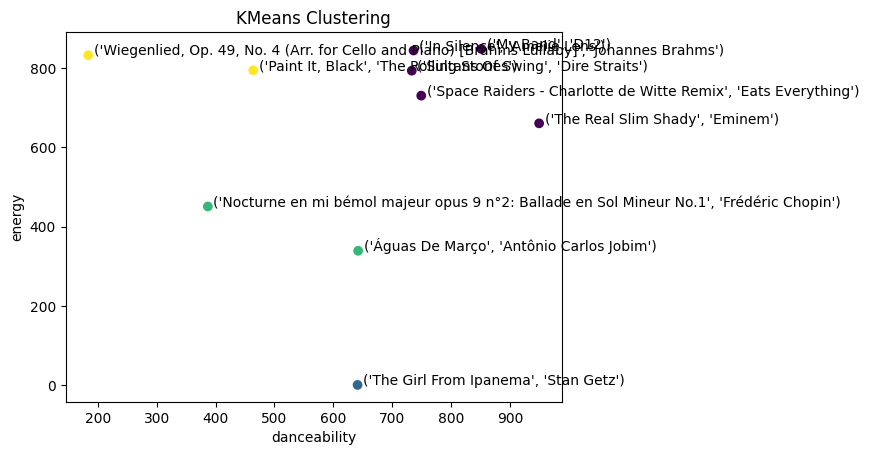

In [ ]:
# @title Visualisation of data points and clusters

# Plot the data points
plt.scatter(x = two_features_df.iloc[:, 0],
            y = two_features_df.iloc[:, 1],
            c = my_2d_kmeans.labels_,
            cmap = 'viridis')

# Annotate the data points
for idx, row in two_features_df.iterrows():
    plt.annotate(idx, (row["danceability"], row["energy"]), xytext=(4, 0), textcoords='offset points')

# Add labels and title
plt.title('KMeans Clustering')
plt.xlabel(two_features_df.columns[0])
plt.ylabel(two_features_df.columns[1])

# Display the plot
plt.show()

# 6.4.  Familiarise yourself with the documentation for scikit-learn


We'll be using scikit-learn a lot in the coming weeks, so it's a good idea to start familiarising yourself with its documentation now. The documentation is very well written, so be sure to check it out, start with the KMeans function that we used in this notebook. Play around with it and read up on some of the parameters that we didn't use.

# Selecting the number of clusters with silhouette analysis on KMeans clustering

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.561464362648773
For n_clusters = 6 The average silhouette_score is : 0.4857596147013469


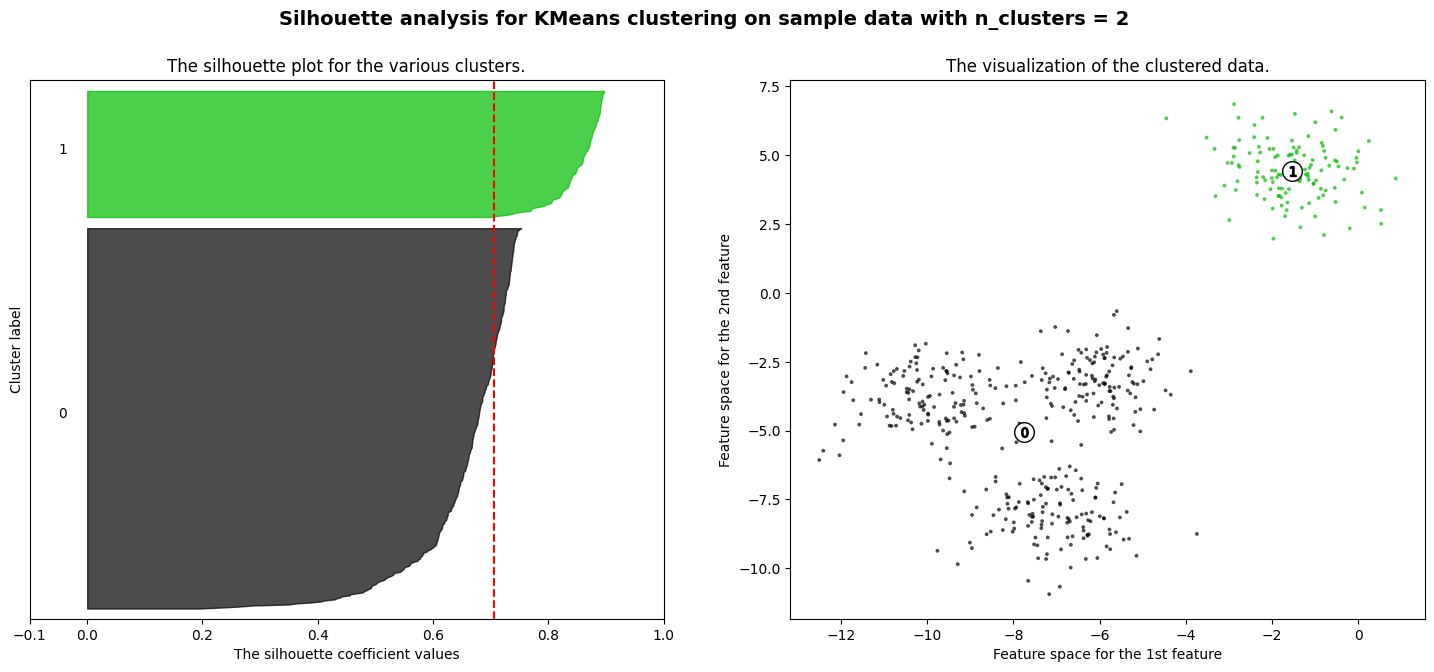

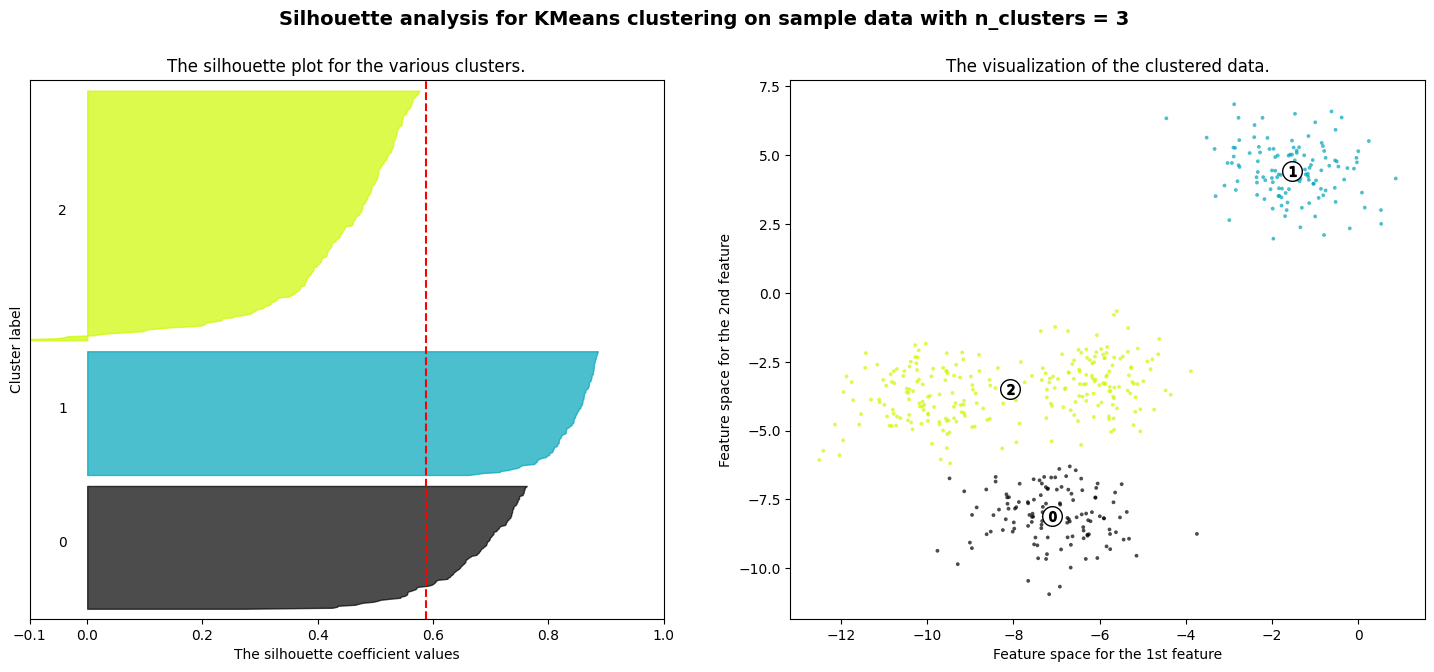

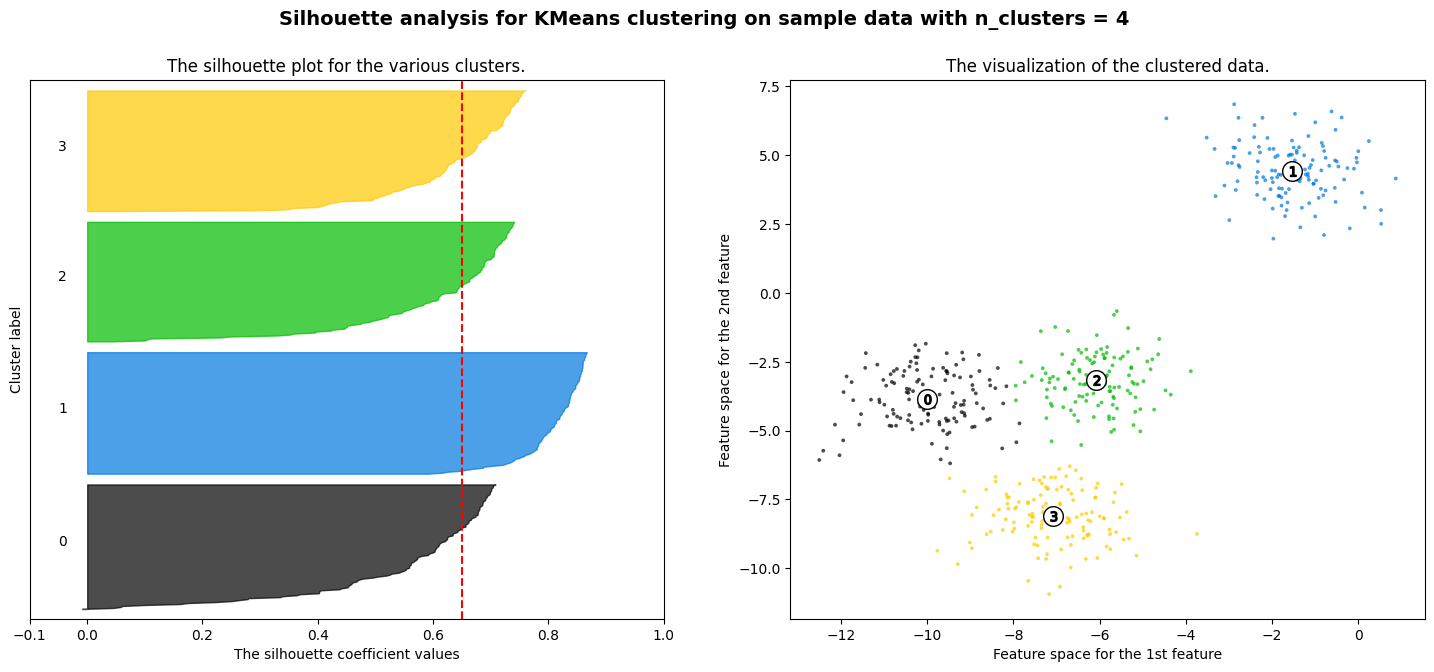

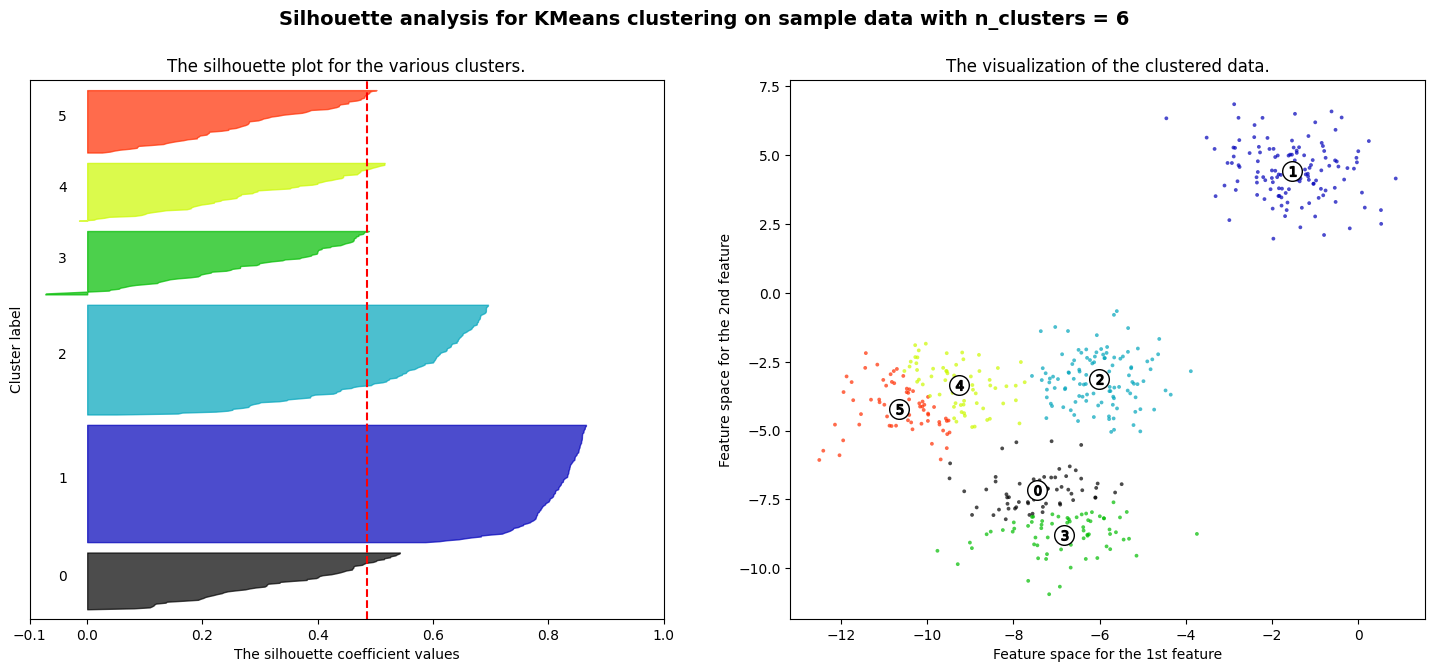

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

6.5. [Optional bonus] See if you can learn to plot in 3 dimensions
Matplotlib allows you to visualise your data in 3D. Get creative and explore how to create a 3D scatter plot using different combinations of three columns from the food DataFrame. Once you have your data, experiment with clustering and assigning distinct colours to each cluster.

Compare the resulting clusters to those obtained using a 2D scatter plot. Does adding a third dimension significantly alter how the data points group together?

For an even more immersive experience, consider using Plotly, a Python library that enables interactive 3D scatter plots. Hovering your mouse over a data point in these plots reveals valuable information, such as the row index and cluster number.

# Matplotlib 3D Scatter Plot

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=0).fit(songs_df[['danceability', 'energy', 'key']])
labels = kmeans.labels_


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(songs_df['danceability'], songs_df['energy'], songs_df['key'], c=labels, cmap='viridis')

ax.set_xlabel('Danceability')
ax.set_ylabel('Energy')
ax.set_zlabel('Key')

plt.show()


# Plotly for Interactive 3D Scatter Plot

In [ ]:
import plotly.express as px

kmeans = KMeans(n_clusters=8, random_state=0).fit(songs_df[['danceability', 'energy', 'key']])
labels = kmeans.labels_
# Replace 'danceability', 'energy', and 'key' with the correct column names
fig = px.scatter_3d(songs_df, x='danceability', y='energy', z='key', color=labels)
fig.show()


# 2D Scatter Plot:

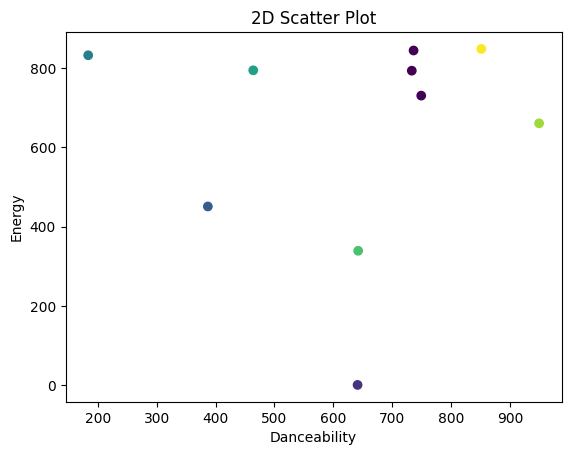

In [ ]:
import matplotlib.pyplot as plt

# Fit your KMeans model
kmeans = KMeans(n_clusters=8, random_state=0).fit(songs_df[['danceability', 'energy']])
labels_2d = kmeans.labels_

# 2D scatter plot
plt.scatter(songs_df['danceability'], songs_df['energy'], c=labels_2d, cmap='viridis')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('2D Scatter Plot')
plt.show()


## audio features which ones you believe to matter the most  and which ones you might consider excluding.

**Most impactful features:**

Energy: Provides a significant insight into the track's intensity.

Danceability: Directly affects how a track feels on the dance floor.

Valence: Offers emotional context.

Mode: Influences the overall feel (happy/sad) of the music.

Tempo: Essential for the track's pace and rhythm.

**Features you might exclude:**

Duration: Unless the length of the track is crucial for the analysis.

Time Signature: Unless you need detailed rhythmic info.

Loudness: Often correlates with energy, so it might be redundant.

